In [94]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import pandas as pd
import Strategy_helper

## Puzzles
We will consider the simple case of nx1 puzzles with n-1 green particles and 1 blue particle. It is easy to show there are n classical basis states for each puzzles. 
Here we will only consider fermionic exchange statistics for brevity.

In [95]:
# Swaps for Nmax x 1 puzzles
def basis(Nmax,n):
    vec = np.zeros((Nmax,1))
    vec[n] = 1
    return np.array(vec)
def SWAP(Nmax,n):
    assert(n<Nmax-1)
    # -1 from fermionic exchange
    mat = -1*np.eye(Nmax)
    mat[n,n] = 0
    mat[n+1,n+1] = 0
    mat[n,n+1] = 1
    mat[n+1,n] = 1
    return mat

# Swaps for 2x3 puzzle with 3 of each color
Nmax = 20
U = sum([-1/2*basis(20,n)@basis(20,n).T for n in range(8)]) +basis(Nmax,8)@basis(Nmax,14).T+basis(Nmax,9)@basis(Nmax,15).T+basis(Nmax,10)@basis(Nmax,16).T\
    +basis(Nmax,11)@basis(Nmax,17).T+basis(Nmax,12)@basis(Nmax,18).T+basis(Nmax,13)@basis(Nmax,19).T
U = U + U.T
M = sum([-1/2*basis(20,n)@basis(20,n).T for n in [4,5,6,7,8,9,14,15]]) +basis(Nmax,0)@basis(Nmax,2).T+basis(Nmax,1)@basis(Nmax,3).T+basis(Nmax,10)@basis(Nmax,19).T\
    +basis(Nmax,11)@basis(Nmax,18).T+basis(Nmax,12)@basis(Nmax,17).T+basis(Nmax,13)@basis(Nmax,16).T
M = M + M.T
D = sum([-1/2*basis(20,n)@basis(20,n).T for n in [0,1,2,3,8,9,14,15]]) +basis(Nmax,4)@basis(Nmax,6).T+basis(Nmax,5)@basis(Nmax,7).T+basis(Nmax,10)@basis(Nmax,12).T\
    +basis(Nmax,11)@basis(Nmax,13).T+basis(Nmax,16)@basis(Nmax,18).T+basis(Nmax,17)@basis(Nmax,19).T
D = D + D.T
LU = sum([-1/2*basis(20,n)@basis(20,n).T for n in [0,1,8,9,10,11,12,13]]) +basis(Nmax,2)@basis(Nmax,14).T+basis(Nmax,3)@basis(Nmax,15).T+basis(Nmax,4)@basis(Nmax,16).T\
    +basis(Nmax,5)@basis(Nmax,17).T+basis(Nmax,6)@basis(Nmax,18).T+basis(Nmax,7)@basis(Nmax,19).T
LU = LU + LU.T

RU = sum([-1/2*basis(20,n)@basis(20,n).T for n in [2,3,10,11,12,13,14,15]]) +basis(Nmax,0)@basis(Nmax,8).T+basis(Nmax,1)@basis(Nmax,9).T+basis(Nmax,4)@basis(Nmax,19).T\
    +basis(Nmax,5)@basis(Nmax,18).T+basis(Nmax,6)@basis(Nmax,17).T+basis(Nmax,7)@basis(Nmax,16).T
RU = RU + RU.T

RD = sum([-1/2*basis(20,n)@basis(20,n).T for n in [0,1,6,7,12,13,18,19]]) +basis(Nmax,2)@basis(Nmax,4).T+basis(Nmax,3)@basis(Nmax,5).T+basis(Nmax,8)@basis(Nmax,10).T\
    +basis(Nmax,9)@basis(Nmax,11).T+basis(Nmax,14)@basis(Nmax,16).T+basis(Nmax,15)@basis(Nmax,17).T
RD = RD + RD.T

LD = sum([-1/2*basis(20,n)@basis(20,n).T for n in [2,3,4,5,12,13,18,19]]) +basis(Nmax,0)@basis(Nmax,6).T+basis(Nmax,1)@basis(Nmax,7).T+basis(Nmax,8)@basis(Nmax,16).T\
    +basis(Nmax,9)@basis(Nmax,17).T+basis(Nmax,10)@basis(Nmax,15).T+basis(Nmax,11)@basis(Nmax,14).T
LD = LD + LD.T

In [3]:
Nmax = 5
CS = [SWAP(Nmax,n) for n in range(Nmax-1)]
QS = []
MS = []
for move in CS:
    QS.append((np.eye(Nmax) + 1j*move)/np.sqrt(2))
    QS.append((np.eye(Nmax) - 1j*move)/np.sqrt(2))
    MS.append((np.eye(Nmax) + 1j*move)/np.sqrt(2))
    MS.append((np.eye(Nmax) - 1j*move)/np.sqrt(2))
    MS.append(move)

## Scrambling
Scrambles are sqeunces of half swaps applied to the solved state. Here we generate a number of random scrambles with some constraintes on the minimum and maximum length of the scramble. 

In [7]:
## Generate a bunch of scrambles
Num_scrambles = 100
min_length = 200
max_length = 500
Scrambles = []
for i in range(Num_scrambles):
    l = random.randint(min_length,max_length)
    move_list = random.choices(QS,k=l)
    state = basis(Nmax,0) # choose the 0 state as solved
    for move in move_list:
        state = move @ state
    Scrambles.append(state)


In [9]:
def is_permutation_matrix(matrix):
    matrix = np.abs(matrix)
    rows, cols = matrix.shape
    if rows != cols:
        return False
    
    # Check if all elements are 0 or 1
    if not np.all(np.logical_or(matrix == 0, matrix == 1)):

        return False
    
    # Check if each row and column sums to 1
    if not (np.all(np.abs(matrix.sum(axis=1)) == 1) and np.all(np.abs(matrix.sum(axis=0)) == 1)):
        return False
    
    return True
for gate in CS:
    print(is_permutation_matrix(gate))


True
True
True
True


# Rules

At first we will consider the situation in which the puzzle is reset after a measurement failure. After that we will consider a simplified version where each solver is only given one puzzle and only has one chance to measure it. 

## Finding performance of optimal strategy for reseting puzzle
The optimal strategy requires us to iterativly find all states that are up to $n$ moves away from the scrambled state. A target state is 1 move away from the scramble if a single actions from the solvers set of actions can transform the scrambled state into the target state. A state is 2 moves away from the scramble if the shortest possible set of actions from the solver to go between the scramble and target state is 2 moves.

Implementing this requires a breadth first search approach, that keeps track of which states have been seen and which have not. This search is implemented using a hashing of the state keeping 8 significant digits and canonicallizing the states. The optimal_search function then implements the search that will either continue until the optimal state is found, or some max_depth constraint is reached.

The function takes in a scramble a set of solving actions and optionally a set of costs for applying solving actions and measureing.

In [7]:
Costs = [1,1] # Swaps cost the same a measuring

In [8]:
dataQ = Strategy_helper.Sample_scrambles_opt(Scrambles,QS,Costs,max_depth=7)

Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.31
Progress: 0.4
Progress: 0.51
Progress: 0.61
Progress: 0.71
Progress: 0.8
Progress: 0.91


In [9]:
dataC = Strategy_helper.Sample_scrambles_opt(Scrambles,CS,Costs,max_depth=7)

Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.31
Progress: 0.4
Progress: 0.51
Progress: 0.61
Progress: 0.71
Progress: 0.8
Progress: 0.91


In [11]:
dataM = Strategy_helper.Sample_scrambles_opt(Scrambles,MS,Costs,max_depth=10)

Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.31
Progress: 0.4
Progress: 0.51
Progress: 0.61
Progress: 0.71
Progress: 0.8
Progress: 0.91


In [12]:
dbfile = open('Data/Other_puzzle/Quantum_Nmax_5', 'ab')
     
pickle.dump(dataQ, dbfile) 
dbfile.close()
                  
dbfile = open('Data/Other_puzzle/Classical_Nmax_5', 'ab')
     
pickle.dump(dataC, dbfile) 
dbfile.close()

dbfile = open('Data/Other_puzzle/Mixed_Nmax_5', 'ab')
     
pickle.dump(dataM, dbfile) 
dbfile.close()


In [135]:
N_vals = [5]
Costs = [1,1] # Swaps cost the same a measuring
for Nmax in N_vals:
    # get the allowed moves
    CS = [SWAP(Nmax,n) for n in range(Nmax-1)]
    QS = []
    MS = []
    for move in CS:
        QS.append((np.eye(Nmax) + 1j*move)/np.sqrt(2))
        QS.append((np.eye(Nmax) - 1j*move)/np.sqrt(2))
        MS.append((np.eye(Nmax) + 1j*move)/np.sqrt(2))
        MS.append((np.eye(Nmax) - 1j*move)/np.sqrt(2))
        MS.append(move)
        
    # generate Scrambles
    for n in range(1):
        Num_scrambles = 25
        min_length = 200
        max_length = 500
        Scrambles = []
        for i in range(Num_scrambles):
            l = random.randint(min_length,max_length)
            move_list = random.choices(QS,k=l)
            state = basis(Nmax,0) # choose the 0 state as solved
            for move in move_list:
                state = move @ state
            Scrambles.append(state)

        # simulate solving
        dataQ = Strategy_helper.Sample_scrambles_opt(Scrambles,QS,Costs,max_depth=10,Verbose=False)
        # Saving
        dbfile = open('Data/Other_puzzle/Quantum_Nmax3_{}_{}'.format(Nmax,n), 'wb')
        pickle.dump(dataQ, dbfile) 
        dbfile.close()

        # simulate solving
        dataC = Strategy_helper.Sample_scrambles_opt(Scrambles,CS,Costs,max_depth=10,Verbose=False)
        # Saving
        dbfile = open('Data/Other_puzzle/Classical_Nmax3_{}_{}'.format(Nmax,n), 'wb')
        pickle.dump(dataC, dbfile) 
        dbfile.close()

    
        # simulate solving
        dataM = Strategy_helper.Sample_scrambles_opt(Scrambles,MS,Costs,max_depth=12)
        # Saving
        dbfile = open('Data/Other_puzzle/Mixed_Nmax3_{}_{}'.format(Nmax,n), 'wb')
        pickle.dump(dataM, dbfile) 
        dbfile.close()

Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progress: 0.8
Progress: 0.92
Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progress: 0.8
Progress: 0.92
Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progress: 0.8
Progress: 0.92
Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progress: 0.8
Progress: 0.92
Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progress: 0.8
Progress: 0.92
Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progress: 0.8
Progress: 0.92
Progress: 0.0
Progress: 0.12
Progress: 0.2
Progress: 0.32
Progress: 0.4
Progress: 0.52
Progress: 0.64
Progress: 0.72
Progres

In [70]:
N_vals = [2,3,4]
Costs = [1,1] # Swaps cost the same a measuring
for Nmax in N_vals:
    # get the allowed moves
    CS = [SWAP(Nmax,n) for n in range(Nmax-1)]
    QS = []
    MS = []
    for move in CS:
        QS.append((np.eye(Nmax) + 1j*move)/np.sqrt(2))
        QS.append((np.eye(Nmax) - 1j*move)/np.sqrt(2))
        MS.append((np.eye(Nmax) + 1j*move)/np.sqrt(2))
        MS.append((np.eye(Nmax) - 1j*move)/np.sqrt(2))
        MS.append(move)
        
    # generate Scrambles
    Num_scrambles = 3000//Nmax
    min_length = 200
    max_length = 500
    Scrambles = []
    for i in range(Num_scrambles):
        l = random.randint(min_length,max_length)
        move_list = random.choices(QS,k=l)
        state = basis(Nmax,0) # choose the 0 state as solved
        for move in move_list:
            state = move @ state
        Scrambles.append(state)
        
    # simulate solving
    dataQ = Strategy_helper.Sample_scrambles_opt(Scrambles,QS,Costs,max_depth=12)
    # Saving
    dbfile = open('Data/Other_puzzle/Quantum_Nmax_{}'.format(Nmax), 'wb')
    pickle.dump(dataQ, dbfile) 
    dbfile.close()
    
    # simulate solving
    dataC = Strategy_helper.Sample_scrambles_opt(Scrambles,CS,Costs,max_depth=12)
    # Saving
    dbfile = open('Data/Other_puzzle/Classical_Nmax_{}'.format(Nmax), 'wb')
    pickle.dump(dataC, dbfile) 
    dbfile.close()
    
    
    # simulate solving
    dataM = Strategy_helper.Sample_scrambles_opt(Scrambles,MS,Costs,max_depth=12)
    # Saving
    dbfile = open('Data/Other_puzzle/Mixed_Nmax_{}'.format(Nmax), 'wb')
    pickle.dump(dataM, dbfile) 
    dbfile.close()

/Users/admin/Documents/Permutation/Permutation_Puzzle/Strategy_helper.py:16: RuntimeWarning: divide by zero encountered in true_divide
  return m/P


Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.3006666666666667
Progress: 0.4
Progress: 0.5006666666666667
Progress: 0.6006666666666667
Progress: 0.7006666666666667
Progress: 0.8
Progress: 0.9006666666666666
Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.3006666666666667
Progress: 0.4
Progress: 0.5006666666666667
Progress: 0.6006666666666667
Progress: 0.7006666666666667
Progress: 0.8
Progress: 0.9006666666666666
Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.3006666666666667
Progress: 0.4
Progress: 0.5006666666666667
Progress: 0.6006666666666667
Progress: 0.7006666666666667
Progress: 0.8
Progress: 0.9006666666666666
Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.301
Progress: 0.4
Progress: 0.501
Progress: 0.601
Progress: 0.701
Progress: 0.8
Progress: 0.901
Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.301
Progress: 0.4
Progress: 0.501
Progress: 0.601
Progress: 0.701
Progress: 0.8
Progress: 0.901
Progress: 0.0
Progress: 0.1
Progress: 0.2
Progress: 0.3

### Analyzing the data
In the case where the puzzle is reset the number of moves until the puzzle is solved follows a gemoetric distribution. 
$$
N_\varphi = (M_\varphi+1)\text{Geo}(P_\varphi)
$$
where $M_\varphi$ is the distance from the scramble to the optimal state $\varphi$ and $P_\varphi$ is the squared overlap of the optimal state with the solved state $|\langle\varphi|\text{solved}\rangle|^2$.
In order to find the true performance of each solver we descretely sample the scramble space to build a distribution $Z(M,P)$ that describes how the parameters of the geometric distribution are distributied among random scrambles of the puzzle. We can finally define $G(n|M,P)$ to be the PDF that describes the distribution of the number of moves to solved $n$ given the scramble based parameters $M,P$.

In the limit of infinite sampling the the distribution of move count independent of scrambles becomes
$$
G(n) = \int_\Omega G(n|M,P) d\mu(\Omega(M,P)) = \sum_{M=1}^\infty \int_0^1 dP G(n|M,P)Z(M,P)
$$



In [62]:
dbfile = open('Data/Other_puzzle/Quantum_Nmax_2', 'rb')
     
dataQ = pickle.load(dbfile)
dbfile.close()
dataQ[1] = dataQ[1].T[0]


dbfile = open('Data/Other_puzzle/Classical_Nmax_4', 'rb')
     
dataC = pickle.load(dbfile)
dbfile.close()
dataC[1] = dataC[1].T[0]

dbfile = open('Data/Other_puzzle/Mixed_Nmax_4', 'rb')
     
dataM = pickle.load(dbfile)
dbfile.close()
dataM[1] = dataM[1].T[0]

In [64]:
print(len(dataQ[0]))

100


In [241]:
## analyzing data for N = 2-4

Frac_Q = []
Frac_M = []
diff_Q = []
diff_M = []
for Nmax in [2,3,4]:
    dbfile = open('Data/Other_puzzle/Quantum_Nmax_{}'.format(Nmax), 'rb')

    dataQ = pickle.load(dbfile)
    dbfile.close()
    dataQ[1] = dataQ[1].T[0]


    dbfile = open('Data/Other_puzzle/Classical_Nmax_{}'.format(Nmax), 'rb')

    dataC = pickle.load(dbfile)
    dbfile.close()
    dataC[1] = dataC[1].T[0]

    if(Nmax!=5):
        dbfile = open('Data/Other_puzzle/Mixed_Nmax_{}'.format(Nmax), 'rb')

        dataM = pickle.load(dbfile)
        dbfile.close()
        dataM[1] = dataM[1].T[0]

    depth = 15
    Num_scrambles = len(dataQ[0])
    print(Num_scrambles)
    Costs = [1,1]
    #Pvals = np.linspace(0,1,10)


    ZQ,MQ,PQ = Strategy_helper.scramble_probabilities(dataQ,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
    ZC,MC,PC = Strategy_helper.scramble_probabilities(dataC,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
    ZM,MM,PM = Strategy_helper.scramble_probabilities(dataM,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
    distQ = []
    distC = []
    distM = []
    meanQ = 0
    meanC = 0
    meanM = 0

    nvals = range(1,300)
    for n in nvals:
        P_n_Q = Strategy_helper.Prob(n,MQ,PQ,ZQ)
        P_n_C = Strategy_helper.Prob(n,MC,PC,ZC)
        P_n_M = Strategy_helper.Prob(n,MM,PM,ZM)
        distQ.append(P_n_Q)
        distC.append(P_n_C)
        distM.append(P_n_M)
        meanQ += n*P_n_Q
        meanC += n*P_n_C
        meanM += n*P_n_M
    print("Quantum solver average:",meanQ)
    print("Classical solver average:",meanC)
    print("Mixed solver average:",meanM)
    assert(np.isclose(sum(distQ),1,rtol=1e-3))
    assert(np.isclose(sum(distC),1,rtol=1e-3))
    assert(np.isclose(sum(distM),1,rtol=1e-3))
    Frac_Q.append(2.0*(meanQ-meanC)/(meanQ+meanC))
    Frac_M.append(2.0*(meanM-meanC)/(meanM+meanC))
    diff_Q.append(meanQ-meanC)
    diff_M.append(meanM-meanC)

1500
Quantum solver average: 2.1442777777777766
Classical solver average: 1.8936666666666666
Mixed solver average: 1.8936666666666666
1000
Quantum solver average: 3.302623412698415
Classical solver average: 3.2139075396824084
Mixed solver average: 2.878193650793648
750
Quantum solver average: 4.653259259259017
Classical solver average: 4.614317460317126
Mixed solver average: 3.9662380952380105


In [242]:
## analyzing data for N = 5

dbfile = open('Data/Other_puzzle/Quantum_Nmax2_5_0', 'rb')

dataQ = pickle.load(dbfile)
dbfile.close()
dataQ[1] = dataQ[1].T[0]

dbfile = open('Data/Other_puzzle/Classical_Nmax2_5_0', 'rb')

dataC = pickle.load(dbfile)
dbfile.close()
dataC[1] = dataC[1].T[0]
for n in range(1,4):
    dbfile = open('Data/Other_puzzle/Quantum_Nmax2_5_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataQ[0] = np.append(dataQ[0],datatemp[0])
    dataQ[1] = np.append(dataQ[1],datatemp[1])
    dbfile = open('Data/Other_puzzle/Classical_Nmax2_5_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataC[0] = np.append(dataC[0],datatemp[0])
    dataC[1] = np.append(dataC[1],datatemp[1])
for n in range(1,24):
    dbfile = open('Data/Other_puzzle/Quantum_Nmax3_5_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataQ[0] = np.append(dataQ[0],datatemp[0])
    dataQ[1] = np.append(dataQ[1],datatemp[1])
    dbfile = open('Data/Other_puzzle/Classical_Nmax3_5_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataC[0] = np.append(dataC[0],datatemp[0])
    dataC[1] = np.append(dataC[1],datatemp[1])

dbfile = open('Data/Other_puzzle/Mixed_Nmax2_5_0', 'rb')

dataM = pickle.load(dbfile)
dbfile.close()
dataM[1] = dataM[1].T[0]    
    
for n in range(1,12):
    dbfile = open('Data/Other_puzzle/Mixed_Nmax2_5_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataM[0] = np.append(dataM[0],datatemp[0])
    dataM[1] = np.append(dataM[1],datatemp[1])
  
    
for n in range(0,20):
    dbfile = open('Data/Other_puzzle/Mixed_Nmax3_5_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataM[0] = np.append(dataM[0],datatemp[0])
    dataM[1] = np.append(dataM[1],datatemp[1])
    
depth = 15
Num_scrambles = len(dataQ[0])
print(Num_scrambles)
Costs = [1,1]
Pvals = np.linspace(0,1,13)


ZQ,MQ,PQ = Strategy_helper.scramble_probabilities(dataQ,depth,Costs,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
ZC,MC,PC = Strategy_helper.scramble_probabilities(dataC,depth,Costs,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
ZM,MM,PM = Strategy_helper.scramble_probabilities(dataM,depth,Costs,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
distQ = []
distC = []
distM = []
meanQ = 0
meanC = 0
meanM = 0

nvals = range(1,300)
for n in nvals:
    P_n_Q = Strategy_helper.Prob(n,MQ,PQ,ZQ)
    P_n_C = Strategy_helper.Prob(n,MC,PC,ZC)
    P_n_M = Strategy_helper.Prob(n,MM,PM,ZM)
    distQ.append(P_n_Q)
    distC.append(P_n_C)
    distM.append(P_n_M)
    meanQ += n*P_n_Q
    meanC += n*P_n_C
    meanM += n*P_n_M
print("Quantum solver average:",meanQ)
print("Classical solver average:",meanC)
print("Mixed solver average:",meanM)

Frac_Q.append(2.0*(meanQ-meanC)/(meanQ+meanC))
Frac_M.append(2.0*(meanM-meanC)/(meanM+meanC))
diff_Q.append(meanQ-meanC)
diff_M.append(meanM-meanC)

1350
Quantum solver average: 5.946607984523448
Classical solver average: 5.899799903536143
Mixed solver average: 5.0435546536523


In [233]:
# Analyzing for N = 6 the biggest we could do but no combined solver
dbfile = open('Data/Other_puzzle/Quantum_Nmax3_6_0', 'rb')

dataQ = pickle.load(dbfile)
dbfile.close()
dataQ[1] = dataQ[1].T[0]

dbfile = open('Data/Other_puzzle/Classical_Nmax3_6_0', 'rb')

dataC = pickle.load(dbfile)
dbfile.close()
dataC[1] = dataC[1].T[0]
for n in range(1,3):
    dbfile = open('Data/Other_puzzle/Quantum_Nmax3_6_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataQ[0] = np.append(dataQ[0],datatemp[0])
    dataQ[1] = np.append(dataQ[1],datatemp[1])
    dbfile = open('Data/Other_puzzle/Classical_Nmax3_6_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp[1] = datatemp[1].T[0]
    dataC[0] = np.append(dataC[0],datatemp[0])
    dataC[1] = np.append(dataC[1],datatemp[1])

for n in range(0,4):
    dbfile = open('Data/Other_puzzle/Quantum_Nmax_6_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    dbfile.close()
    datatemp2 = [[],[]]
    for data in datatemp:
        datatemp2[0].append(data[0])
        datatemp2[1].append(data[1])
    dataQ[0] = np.append(dataQ[0],np.array(np.transpose(datatemp2[0])))
    dataQ[1] = np.append(dataQ[1],np.array(np.transpose(datatemp2[1])))
    dataQ[0] = dataQ[0].astype(int)
    dbfile = open('Data/Other_puzzle/Classical_Nmax_6_{}'.format(n), 'rb')

    datatemp = pickle.load(dbfile)
    datatemp3 = [[],[]]
    for data in datatemp:
        datatemp3[0].append(data[0])
        datatemp3[1].append(data[1])
    dbfile.close()
    dataC[0] = np.append(dataC[0],np.array(np.transpose(datatemp3[0])))
    dataC[0] = dataC[0].astype(int)
    dataC[1] = np.append(dataC[1],np.array(np.transpose(datatemp3[1])))
    
    
depth = 15
Num_scrambles = len(dataQ[0])
print(Num_scrambles)
Costs = [1,1]
Pvals = np.linspace(0,1,12)


ZQ,MQ,PQ = Strategy_helper.scramble_probabilities(dataQ,depth,Costs,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
ZC,MC,PC = Strategy_helper.scramble_probabilities(dataC,depth,Costs,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
#ZM,MM,PM = Strategy_helper.scramble_probabilities(dataM,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
distQ = []
distC = []
distM = []
meanQ = 0
meanC = 0
meanM = 0

nvals = range(1,300)
for n in nvals:
    P_n_Q = Strategy_helper.Prob(n,MQ,PQ,ZQ)
    P_n_C = Strategy_helper.Prob(n,MC,PC,ZC)
    P_n_M = Strategy_helper.Prob(n,MM,PM,ZM)
    distQ.append(P_n_Q)
    distC.append(P_n_C)
    distM.append(P_n_M)
    meanQ += n*P_n_Q
    meanC += n*P_n_C
    meanM += n*P_n_M
print("Quantum solver average:",meanQ)
print("Classical solver average:",meanC)

Frac_Q.append(2.0*(meanQ-meanC)/(meanQ+meanC))
diff_Q.append(meanQ-meanC)


830
Quantum solver average: 7.597088522149752
Classical solver average: 7.428574622712891


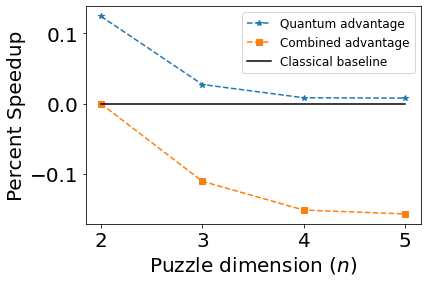

In [246]:
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.plot([2,3,4,5],Frac_Q,'--*')
plt.plot([2,3,4,5],Frac_M,'--s')
plt.plot([2,5],[0,0],'k')
plt.legend(['Quantum advantage','Combined advantage','Classical baseline'])
plt.ylabel('Percent Speedup')
plt.xlabel(r'Puzzle dimension $(n)$')
plt.savefig('Figures/advantage.pdf',format='pdf',bbox_inches='tight')

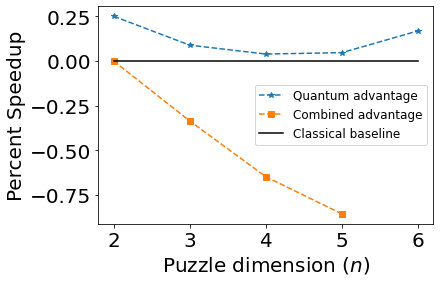

In [238]:
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.plot([2,3,4,5,6],diff_Q,'--*')
plt.plot([2,3,4,5],diff_M,'--s')
plt.plot([2,6],[0,0],'k')
plt.legend(['Quantum advantage','Combined advantage','Classical baseline'])
plt.ylabel('Percent Speedup')
plt.xlabel(r'Puzzle dimension $(n)$')
plt.savefig('Figures/absadvantage.pdf',format='pdf',bbox_inches='tight')

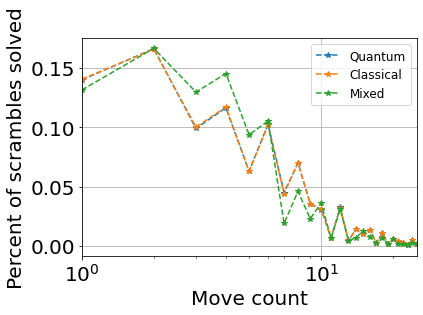

In [60]:
fig,ax = plt.subplots()
# ax.semilogx(nvals,[sum(distQ[0:n]) for n in range(len(distQ))],'--*')
# ax.semilogx(nvals,[sum(distC[0:n]) for n in range(len(distC))],'--*')
# ax.semilogx(nvals,[sum(distM[0:n]) for n in range(len(distM))],'--*')
ax.semilogx(nvals,distQ,'--*')
ax.semilogx(nvals,distC,'--*')
ax.semilogx(nvals,distM,'--*')
ax.set_xlim([1,25])
ax.legend(["Quantum","Classical",'Mixed'])
ax.set_ylabel("Percent of scrambles solved")
ax.set_xlabel("Move count")
ax.grid()
plt.savefig("./Figures/SolvingCDF.pdf",format="pdf")

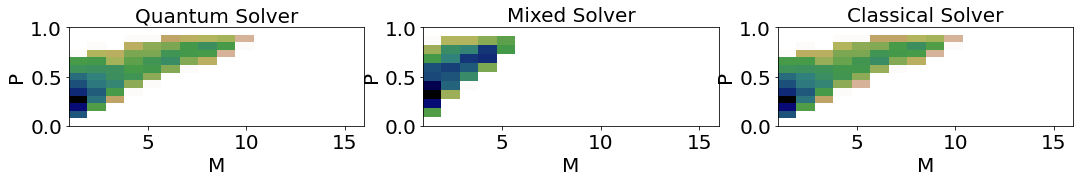

In [141]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(ZQ, cmap=plt.cm.gist_earth_r,
          extent=[1, depth+1, 0, 1],origin='lower',aspect = 5,norm=LogNorm())
ax[0].set_title('Quantum Solver')
ax[0].set_xlabel('M')
ax[0].set_ylabel('P')
ax[1].imshow(ZM, cmap=plt.cm.gist_earth_r,
          extent=[1, depth+1, 0, 1],origin='lower',aspect = 5,norm=LogNorm())
ax[1].set_title('Mixed Solver')
ax[1].set_xlabel('M')
ax[1].set_ylabel('P')
ax[2].imshow(ZC, cmap=plt.cm.gist_earth_r,
          extent=[1, depth+1, 0, 1],origin='lower',aspect = 5,norm=LogNorm())
ax[2].set_title('Classical Solver')
ax[2].set_xlabel('M')
ax[2].set_ylabel('P')
plt.show()

In [62]:
def scramble_expected_dist(data):
    """
    :param data: 2D numpy array of optimal values of M,P from many scrambles
    :param depth: integer largest M 
    :param Cost: a list of costs, Cost[0] is the cost of moving and Cost[1] is the cost of measureing
    :param Mvals: grid of M values to evaluate probabilties on
    :param Pvals: grid of P values to evaluate probabilties on
    
    :returns Z: 2D numpy array with dimensions [len(Mvals),len(Pvals)]
    :returns Mvals: np array of grid used to calculate probabilties
    :returns Pvals: np array of grid used to calculate probabilties
    """
    expected = data[0]/data[1]
    Num_scrambles = len(data[0])
    N = int(2*(Num_scrambles)**(1/3))
    E_vals = np.linspace(1,12,N-1)
    E_vals = np.insert(E_vals,0,0)
    counts = np.zeros(N)
    for i in range(N-1):
        for datapoint in expected:
            if (datapoint>E_vals[i] and datapoint<= E_vals[i+1]):
                counts[i] += 1
    return (counts/Num_scrambles,E_vals)
   

In [63]:
ZQ,EQ = scramble_expected_dist(dataQ)
ZC,EC = scramble_expected_dist(dataC)
ZM,EM = scramble_expected_dist(dataM)

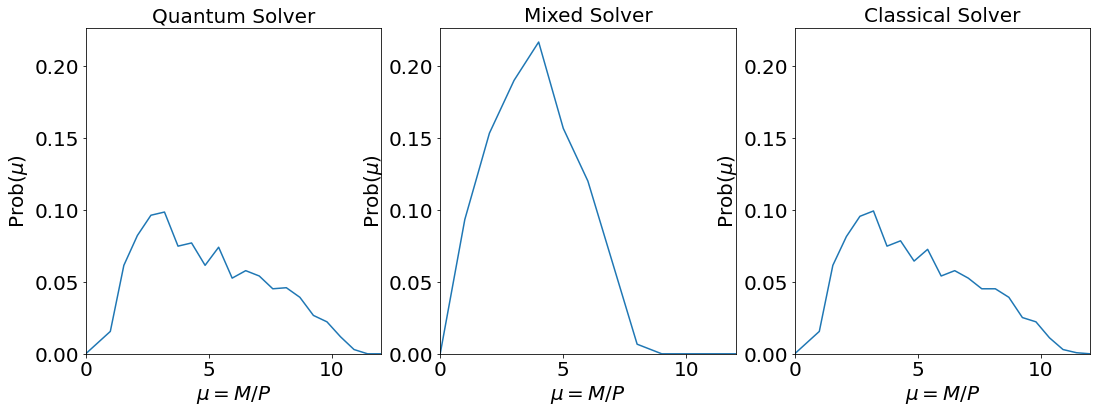

In [64]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].plot(EQ,ZQ)
ax[0].set_title('Quantum Solver')
ax[0].set_xlabel(r'$\mu = M/P$')
ax[0].set_ylabel(r'Prob($\mu$)')
ax[0].set_xlim([min(EC),max(EC)])
ax[0].set_ylim([0,max(ZM+.01)])
ax[1].plot(EM,ZM)
ax[1].set_title('Mixed Solver')
ax[1].set_xlabel(r'$\mu = M/P$')
ax[1].set_ylabel(r'Prob($\mu$)')
ax[1].set_xlim([min(EC),max(EC)])
ax[1].set_ylim([0,max(ZM)+.01])
ax[2].plot(EC,ZC)
ax[2].set_title('Classical Solver')
ax[2].set_xlabel(r'$\mu = M/P$')
ax[2].set_ylabel(r'Prob($\mu$)')
ax[2].set_xlim([min(EC),max(EC)])
ax[2].set_ylim([0,max(ZM)+.01])
plt.show()

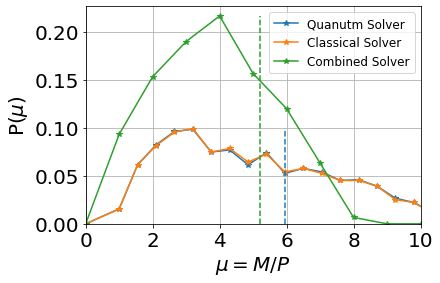

In [65]:
fig,ax = plt.subplots()
ax.plot(EQ,ZQ,'-*')
ax.plot(EC,ZC,'-*')
ax.plot(EM,ZM,'-*')
ax.set_xlabel(r'$\mu = M/P$')
ax.set_ylabel(r'P($\mu$)')
ax.legend(['Quanutm Solver', 'Classical Solver', 'Combined Solver'])
ax.plot([meanQ,meanQ],[0,max(ZQ)],'--',color='tab:blue')
#ax.plot([meanC,meanC],[0,ZC[11]],'--',color='tab:orange')
ax.plot([meanM,meanM],[0,max(ZM)],'--',color='tab:green')
ax.set_xlim([min(EC),10])
ax.set_ylim([0,max(ZM)+.01])
ax.grid()
plt.savefig("./Figures/Expected_dist.pdf",format="pdf")

In [57]:
def scramble_move_dist(data):
    """
    :param data: 2D numpy array of optimal values of M,P from many scrambles
    :param depth: integer largest M 
    :param Cost: a list of costs, Cost[0] is the cost of moving and Cost[1] is the cost of measureing
    :param Mvals: grid of M values to evaluate probabilties on
    :param Pvals: grid of P values to evaluate probabilties on
    
    :returns Z: 2D numpy array with dimensions [len(Mvals),len(Pvals)]
    :returns Mvals: np array of grid used to calculate probabilties
    :returns Pvals: np array of grid used to calculate probabilties
    """
    Moves = data[0]
    Mvals = np.arange(min(Moves),max(Moves)+1)
    counts = np.zeros(len(Mvals))
    for i,M in enumerate(Mvals):
        for datapoint in Moves:
            if (datapoint==M):
                counts[i] += 1
    return (counts/Num_scrambles,Mvals)
   

In [58]:
ZQ,EQ = scramble_move_dist(dataQ)
ZC,EC = scramble_move_dist(dataC)
ZM,EM = scramble_move_dist(dataM)

array([1, 2, 3, 4, 5])

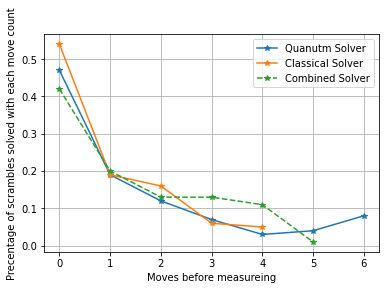

In [59]:
fig,ax = plt.subplots()
ax.plot(EQ-1,ZQ,'-*')
ax.plot(EC-1,ZC,'-*')
ax.plot(EM-1,ZM,'--*')
ax.set_xlabel('Moves before measureing')
ax.set_ylabel(r'Precentage of scrambles solved with each move count')
ax.legend(['Quanutm Solver', 'Classical Solver', 'Combined Solver'])

ax.grid()
EC

In [66]:
ZQ,MQ,PQ = Strategy_helper.scramble_probabilities(dataQ,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
ZC,MC,PC = Strategy_helper.scramble_probabilities(dataC,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
ZM,MM,PM = Strategy_helper.scramble_probabilities(dataM,depth,Costs)#,Pvals=Pvals)#,Mvals=Mvals,Pvals=Pvals)
distQ = []
distC = []
distM = []
meanQ = 0
meanC = 0
meanM = 0

nvals = range(1,300)
for n in nvals:
    P_n_Q = Strategy_helper.Prob(n,MQ,PQ,ZQ)
    P_n_C = Strategy_helper.Prob(n,MC,PC,ZC)
    P_n_M = Strategy_helper.Prob(n,MM,PM,ZM)
    distQ.append(P_n_Q)
    distC.append(P_n_C)
    distM.append(P_n_M)

<BarContainer object of 15 artists>

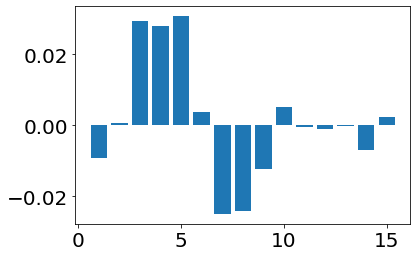

In [74]:
plt.bar(nvals[0:15],np.subtract(distM[0:15],distC[0:15]))

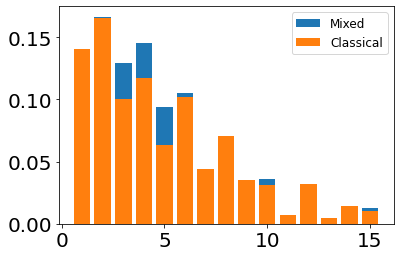

In [78]:
plt.bar(nvals[0:15],distM[0:15])
plt.bar(nvals[0:15],distC[0:15])
plt.legend(['Mixed','Classical'])